In [1]:
import vitaldb
import numpy as np
import pandas as pd
import os, pickle
import matplotlib.pyplot as plt


# define variables
SRATE = 100

# 1. Vital files to numpy (TIVA cases)
Patients : TIVA - general ane_type
TIVA : 2326 out of 6388
general ane_type : 

In [31]:
# tracks to extract / VENT_SET_TV -> VENT_INSP_TM, SET_INSP_TM
track_names = ["SNUADC/ECG_II", "SNUADC/PLETH", "Solar8000/VENT_INSP_TM", "Primus/SET_INSP_TM", "Orchestra/PPF20_CE", "Orchestra/RFTN20_CE"]


# create saving folder
file_path = "./vital_np"
if not os.path.exists(file_path):
    os.mkdir(file_path)


# dataframe of patient information    
df = pd.read_csv("https://api.vitaldb.net/cases")

# target patients' caseids
caseids = list(vitaldb.caseids_tiva & set(df.loc[df['ane_type'] == 'General', 'caseid']))


cnt = 0
for caseid in caseids:
    cnt = cnt + 1
    print(f'{cnt}/{len(caseids)}')
    
    # check if file is already existing
    filename = f'{file_path}/{caseid}.npz'
    if os.path.isfile(filename):
        continue
    
    
    # get vital file and save as numpy
    vf = vitaldb.VitalFile(caseid, track_names)
    vals = vf.to_numpy(track_names, interval=1/SRATE)

    
    # saving files
    if not np.mean(~np.isnan(vals[:,2])):
        if not np.mean(~np.isnan(vals[:,3])):
            print(f'caseid {caseid} - no valid data for insp_tm')
        np.savez(filename, ECG=vals[:,0], PPG=vals[:,1], INTU=vals[:,3], PPF=vals[:,4], RFTN=vals[:,5])
    else:
        np.savez(filename, ECG=vals[:,0], PPG=vals[:,1], INTU=vals[:,2], PPF=vals[:,4], RFTN=vals[:,5])
    

1/2699
2/2699
3/2699
4/2699
5/2699
6/2699
7/2699
8/2699
caseid 1095 - no valid data for insp_tm
9/2699
10/2699
11/2699
12/2699
13/2699
14/2699
15/2699
16/2699
17/2699
18/2699
caseid 1728 - no valid data for insp_tm
19/2699
20/2699
21/2699
22/2699
23/2699
24/2699
25/2699
26/2699
27/2699
28/2699
29/2699
30/2699
31/2699
32/2699
caseid 2411 - no valid data for insp_tm
33/2699
34/2699
caseid 2464 - no valid data for insp_tm
35/2699
36/2699
37/2699
38/2699
39/2699
40/2699
caseid 2733 - no valid data for insp_tm
41/2699
42/2699
43/2699
44/2699
45/2699
46/2699
47/2699
48/2699
49/2699
50/2699
51/2699
52/2699
53/2699
54/2699
55/2699
56/2699
caseid 3569 - no valid data for insp_tm
57/2699
58/2699
caseid 3759 - no valid data for insp_tm
59/2699
60/2699
61/2699
62/2699
63/2699
64/2699
65/2699
caseid 4200 - no valid data for insp_tm
66/2699
67/2699
caseid 4261 - no valid data for insp_tm
68/2699
69/2699
70/2699
71/2699
caseid 4623 - no valid data for insp_tm
72/2699
73/2699
74/2699
75/2699
76/2699
7

In [107]:
## manually saving
file_path = "vital_np"
caseid = 13
filename = f'{file_path}/{caseid}.npz'

# get vital file and save as numpy
vf = vitaldb.VitalFile(caseid, track_names)
vals = vf.to_numpy(track_names, interval=1/SRATE)

if not np.mean(~np.isnan(vals[:,2])):
    if not np.mean(~np.isnan(vals[:,3])):
        print(f'caseid {caseid} - no valid data for insp_tm')
    np.savez(filename, ECG=vals[:,0], PPG=vals[:,1], INTU=vals[:,3], PPF=vals[:,4], RFTN=vals[:,5])
else:
    np.savez(filename, ECG=vals[:,0], PPG=vals[:,1], INTU=vals[:,2], PPF=vals[:,4], RFTN=vals[:,5])

In [21]:
# dataframe of patient information    
df = pd.read_csv("https://api.vitaldb.net/cases")

# target patients' caseids
caseids = vitaldb.caseids_tiva & set(df.loc[df['ane_type'] == 'General', 'caseid'])

# c_insp : vent_sinp_tm이 empty인 caseids
set(caseids) & set(c_insp)

{783,
 904,
 1095,
 1120,
 1157,
 1728,
 1757,
 2016,
 2185,
 2231,
 2252,
 2326,
 2411,
 2453,
 2464,
 2733,
 3200,
 3270,
 3291,
 3311,
 3537,
 3569,
 3759,
 4200,
 4258,
 4261,
 4373,
 4510,
 4623,
 4652,
 4886,
 4959,
 5083,
 5289,
 5329,
 5330,
 5490,
 5682,
 5687,
 5696,
 6285}

# 2. Input 60s from vital data

In [109]:
# create saving folder
file_path = "vital_np"
save_path = "input_60s"
if not os.path.exists(save_path):
    os.mkdir(save_path)
    
    
# target patients' caseids; discarded 15 cases which don't have the index to guess intubation time 
df = pd.read_csv("https://api.vitaldb.net/cases")
caseids = (vitaldb.caseids_tiva & set(df.loc[df['ane_type'] == 'General', 'caseid']))
caseids = list(caseids - {1095, 1728, 2411, 2464, 2733, 3569, 3759, 4200, 4261, 4623, 4886, 5289, 5329, 5696, 6285})
    

cnt = 0
for caseid in caseids[:]:
    cnt = cnt + 1
    print(f'{cnt}/{len(caseids)}')
    vals = np.load(f'{file_path}/{caseid}.npz')
    
    
    filename = f'{save_path}/{caseid}.npz'
    if os.path.isfile(filename):
        continue
    
    
    # intubation time - find the first t which satisfies vent_set_tm != nan & ppf_ce != nan
    t_intu = np.where(~np.isnan(vals['RFTN']))[0][0]

    intu = vals['INTU']
    idc_intu = np.where(~np.isnan(intu))[0]
    while True:
        # vent_insp_tm이 nan이 아닌 경우
        if not np.isnan(intu[t_intu]):
            print(t_intu)
            idx = np.where(idc_intu==t_intu)[0][0]
            prev = t_intu

            switch = True
            for i in range(1,16):
                if idc_intu[idx+i] - prev > 210:
                    switch = False
                    t_intu = t_intu + 1
                prev = idc_intu[idx+i]

            if switch:
                break

        else:
            t_intu = t_intu + 1
    
    
    # non-event data : extract vital from previous 120s-60s from intubation
    ppg = vals['PPG']
    prev_ppg = ppg[t_intu - SRATE*120:t_intu - SRATE*60]
    
    ecg = vals['ECG']
    prev_ecg = ecg[t_intu - SRATE*120:t_intu - SRATE*60]
    
    
    # after intubation, pain calculated using TSS, CISA
    post_ppg = ppg[t_intu:t_intu + SRATE*60]
    post_ecg = ecg[t_intu:t_intu + SRATE*60]
    
    ppf = vals['PPF']
    ppf = ppf[t_intu:t_intu + SRATE*60]
    
    rftn = vals['RFTN']
    rftn = rftn[t_intu:t_intu + SRATE*60]
    
    
    # saving files
    #filename = f'{save_path}/{caseid}.npz'
    np.savez(filename, nECG=prev_ecg, nPPG=prev_ppg, ECG=post_ecg, PPG=post_ppg, PPF=ppf, RFTN=rftn)

1/2684
2/2684
3/2684
4/2684
5/2684
6/2684
7/2684
8/2684
9/2684
10/2684
11/2684
12/2684
13/2684
14/2684
15/2684
16/2684
17/2684
18/2684
19/2684
20/2684
21/2684
22/2684
23/2684
24/2684
25/2684
26/2684
27/2684
28/2684
29/2684
30/2684
31/2684
32/2684
33/2684
34/2684
35/2684
36/2684
37/2684
38/2684
39/2684
40/2684
41/2684
42/2684
43/2684
44/2684
45/2684
46/2684
47/2684
48/2684
49/2684
50/2684
51/2684
52/2684
53/2684
54/2684
55/2684
56/2684
57/2684
58/2684
59/2684
60/2684
61/2684
62/2684
63/2684
64/2684
65/2684
66/2684
67/2684
68/2684
69/2684
70/2684
71/2684
72/2684
73/2684
74/2684
75/2684
76/2684
77/2684
78/2684
79/2684
80/2684
81/2684
82/2684
83/2684
84/2684
85/2684
86/2684
87/2684
88/2684
89/2684
90/2684
91/2684
92/2684
93/2684
94/2684
95/2684
96/2684
97/2684
98/2684
99/2684
100/2684
101/2684
102/2684
103/2684
104/2684
105/2684
106/2684
107/2684
108/2684
109/2684
110/2684
111/2684
112/2684
113/2684
114/2684
115/2684
116/2684
117/2684
118/2684
119/2684
120/2684
121/2684
122/2684
123/2684
1

## Validation

In [127]:
### TSS(total surgical stimulation) = 1.57 - rftn20_ce / 3
### CISA(combined index of stimulus and analgesia) = stim_intensity - beta * ce + gamma, beta = 1/8, gamma = 1.5, stim_intensity = 5.5 

rftn20 = vals['RFTN']
rftn20 = rftn20[~np.isnan(rftn20)]
tss = 1.57 - rftn20 / 3

array([0.23699998, 0.23699998, 0.23699998, 0.23699998, 0.23699998,
       0.23699998, 0.23699998, 0.23699998, 0.23699998, 0.23699998,
       0.23699998, 0.23699998, 0.23699998, 0.23699998, 0.23699998,
       0.23699998, 0.23699998, 0.23699998, 0.23699998, 0.23699998,
       0.23699998, 0.23733336, 0.23766667, 0.23833337, 0.23899999,
       0.24033331, 0.24133331, 0.24200001, 0.24333333, 0.24433333,
       0.24600004, 0.24733335, 0.24899998, 0.25066669, 0.2526667 ,
       0.25500002, 0.25700004, 0.25833335, 0.26066668, 0.26266669,
       0.26500001, 0.26733334, 0.26999997, 0.27233337, 0.275     ,
       0.27833333, 0.28133335, 0.28299998, 0.286     , 0.28866663,
       0.29166665, 0.29466667, 0.2976667 , 0.30100003, 0.30399997,
       0.3083333 , 0.31166663, 0.31366665, 0.31699998, 0.32033331])

In [130]:
cisa = 7 - rftn20 / 4
cisa

array([6.00024998, 6.00024998, 6.00024998, 6.00024998, 6.00024998,
       6.00024998, 6.00024998, 6.00024998, 6.00024998, 6.00024998,
       6.00024998, 6.00024998, 6.00024998, 6.00024998, 6.00024998,
       6.00024998, 6.00024998, 6.00024998, 6.00024998, 6.00024998,
       6.00024998, 6.00050002, 6.00075001, 6.00125003, 6.00174999,
       6.00274998, 6.00349998, 6.00400001, 6.005     , 6.00575   ,
       6.00700003, 6.00800002, 6.00924999, 6.01050001, 6.01200002,
       6.01375002, 6.01525003, 6.01625001, 6.01800001, 6.01950002,
       6.02125001, 6.023     , 6.02499998, 6.02675003, 6.02875   ,
       6.03125   , 6.03350002, 6.03474998, 6.037     , 6.03899997,
       6.04124999, 6.04350001, 6.04575002, 6.04825002, 6.05049998,
       6.05374998, 6.05624998, 6.05774999, 6.06024998, 6.06274998])

2022


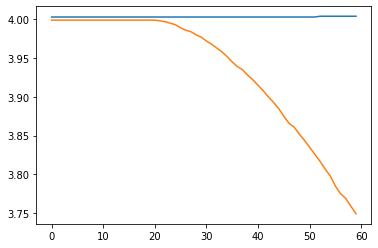

In [129]:
import random

#caseid = random.sample(caseids, 1)[0]
vals = np.load(f'{save_path}/{caseid}.npz')

print(caseid)
x = vals['PPF']
plt.plot(x[~np.isnan(x)])
y = vals['RFTN']
plt.plot(y[~np.isnan(y)])

# 3. Dataset

## preprocessing

In [ ]:
import pre_generator as gen
import pickle

gen.preprocess(file_path='input_60s', LEN_INPUT = 20, OVERLAP = 10, SRATE = 100)

In [12]:
df_demograph = pd.read_csv("https://api.vitaldb.net/cases")
df_demograph

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,...,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
0,1,5955,0,11520,-540,10860,-540,10380,-236220,627780,...,0,120,0.0,100,70,0,10,0,0,0
1,2,2487,0,15720,-1020,14940,1740,14640,-221160,1506840,...,0,150,0.0,0,100,0,20,0,0,0
2,3,2861,0,4440,-540,4260,-540,3960,-218640,40560,...,0,0,0.0,0,50,0,0,0,0,0
3,4,1903,0,21000,-720,20280,2580,18180,-201120,576480,...,0,80,0.0,100,100,0,50,0,0,0
4,5,4416,0,21540,-960,22440,2640,21840,-67560,3734040,...,0,0,0.0,0,160,0,10,900,0,2100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6383,6384,5583,0,15240,-240,15660,-240,15060,-215340,648660,...,0,150,0.0,0,90,0,20,0,0,0
6384,6385,2278,0,20640,-540,21000,-540,19800,-225600,1675200,...,0,100,0.0,0,100,0,25,30,0,300
6385,6386,4045,0,19440,-660,19140,3540,18540,-200460,836340,...,0,70,0.0,0,130,0,10,0,0,0
6386,6387,5230,0,12000,-540,12840,1740,12240,-227760,377040,...,0,120,0.0,0,50,0,0,0,0,0


In [29]:
df_preprocess = pickle.load(open('cache/preprocess/df_preprocess', 'rb'))
#df_preprocess.rename(columns = {'file_path' : 'caseid'}, inplace=True)


# age, gender 추가
df_demograph = pd.read_csv("https://api.vitaldb.net/cases")
df_preprocess['age'] = np.nan
df_preprocess['gender'] = np.nan


for idx, row in df_preprocess.iterrows():     
    row_demo = df_demograph[df_demograph['caseid']==int(row['caseid'])]


    df_preprocess.loc[idx, 'age'] = row_demo['age'].values[0]
    df_preprocess.loc[idx, 'gender'] = row_demo['sex'].values[0]

          
df_preprocess.reset_index(drop=True, inplace=True)
print('dumping start')
pickle.dump(df_preprocess, open('cache/preprocess/df_preprocess', 'wb'))
print('dumping success')   


df_preprocess

dumping start
dumping success


,caseid,1,2,3,4,5,6,7,8,9,10,age,gender
0,5974,"[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]","[True, [0.0, 0.0, 0.0], [0.0, 0.03846153846153...","[True, [0.0, 0.0, 0.0], [0.0, 0.04], 0.0341666...","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0.07766666...","[True, [0.0, 0.0, 0.0], [0.038461538461538464,...","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0.17106666...",49.0,F
1,801,"[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]","[False, [0.0, 0.0, 0.0], [0.03225806451612903,...","[False, [0.0, 0.0, 0.0], [0.03225806451612903,...","[False, [0.0, 0.0, 0.0], [0.09375, 0.892857142...","[False, [0.0, 0.0, 0.0], [0.23333333333333334,...","[False, [0.0, 0.0, 0.0], [0.3103448275862069, ...",62.0,F
2,2790,"[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]","[True, [0.0, 0.0, 0.0], [0.0, 0.04], 0.2393666...","[True, [0.0, 0.0, 0.0], [0.0, 0.08], 0.2391281...","[True, [0.0, 0.0, 0.0], [0.0, 0.08], 0.2395555...","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0.24490474...","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0.25905553...",60.0,F
3,1413,"[True, [0.0, 0.0, 0.0], [0.0, 0.05], 0, 0]","[True, [0.0, 0.0, 0.0], [0.05, 0.0], 0, 0]","[True, [0.0, 0.0, 0.0], [0.047619047619047616,...","[False, [0.0, 0.0, 0.0], [0.0, 0.1], 0, 0]","[False, [0.0, 0.0, 0.0], [0.0, 0.2], 0, 0]","[False, [0.0, 0.0, 0.0], [0.18181818181818182,...","[False, [0.0, 0.0, 0.0], [0.5, 0.1739130434782...","[False, [0.0, 0.0, 0.0], [0.42857142857142855,...","[False, [0.0, 0.0, 0.0], [0.5882352941176471, ...","(False, [0.0, 0.0, 0.0], [-2, -2])",48.0,M
4,4057,"[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]","[True, [0.0, 0.0, 0.0], [0.0625, 0.0], 0, 0]","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 6.37558...","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 6.37552...","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 6.37550...","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 6.37545...","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 6.37535...",50.0,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2679,5882,"[False, [0.0, 0.0, 0.0], [0.0, 0.9285714285714...","[False, [0.0, 0.0, 0.0], [0.0, 0.6666666666666...","[False, [0.0, 0.0, 0.0], [0.16666666666666666,...","[False, [0.0, 0.0, 0.0], [0.0, 0.2307692307692...","[True, [0.0, 0.0, 0.0], [0.0, 0.07692307692307...","[False, [0.0, 0.0, 0.0], [0.0, 0.16], 0.254633...","[True, [0.0, 0.0, 0.0], [0.0, 0.08], 0.2714333...","[False, [0.0, 0.0, 0.0], [0.0, 0.1153846153846...","[False, [0.0, 0.0, 0.0], [0.0, 0.52], 0.318633...","[False, [0.0, 0.0, 0.0], [0.045454545454545456...",61.0,M
2680,927,"[False, [0.0, 0.0, 0.0], [0.0, 0.1666666666666...","[True, [0.0, 0.0, 0.0], [0.0, 0.0625], 0, 0]","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]","[False, [0.0, 0.0, 0.0], [0.25, 1.0], 0, 0]","[False, [0.0, 0.0, 0.0], [0.7857142857142857, ...","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0.24526190...","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0.24460714...","[True, [0.0, 0.0, 0.0], [0.07692307692307693, ...","[True, [0.0, 0.0, 0.0], [0.07692307692307693, ...","[True, [0.0, 0.0, 0.0], [0.08333333333333333, ...",60.0,M
2681,373,"[False, [0.0, 0.0, 0.0], [0.0, 0.8095238095238...","[False, [0.0, 0.0, 0.0], [0.0, 0.7894736842105...","[False, [0.0, 0.0, 0.0], [0.0, 0.2631578947368...","[False, [0.0, 0.0, 0.0], [0.0, 0.3684210526315...","[False, [0.0, 0.0, 0.0], [0.0, 0.4210526315789...","[True, [0.0, 0.0, 0.0], [0.03333333333333333, ...","(False, [0.0, 0.0, 0.0], [-2, -2])","[False, [0.0, 0.0, 0.0

In [24]:
df_preprocess = pickle.load(open('cache/preprocess/df_preprocess', 'rb'))
ne_pass, e_pass = 0, 0


for _, row in df_preprocess.iterrows():   
    for i in range(0,5):
        if row[str(i+1)][0]:
            ne_pass = ne_pass + 1

    for i in range(5,10):
        if row[str(i+1)][0]:
            e_pass = e_pass + 1
            
print(f'non-event seg pass: {ne_pass/5/2684}, event seg pass: {e_pass/5/2684}')
print(f'passed segments : {ne_pass+e_pass}')

non-event seg pass: 0.46460506706408344, event seg pass: 0.3883755588673622
passed segments : 11447


## Caseid shuffling (training set, test set)

In [3]:
df_preprocess = pickle.load(open('cache/preprocess/df_preprocess', 'rb'))


# 살아남은 caseid 확인
p_caseids = []
for _, row in df_preprocess.iterrows():
    for i in range(0,10):
        if row[str(i+1)][0]:
            p_caseids.append(row['caseid'])
            break

print(f'survived caseids : {len(p_caseids)} cases / {len(df_preprocess)} cases')

survived caseids : 2100 cases / 2684 cases


In [10]:
# 예전 방법
from sklearn.utils import shuffle


caseid_test = shuffle(p_caseids, n_samples = int(len(p_caseids) * 0.1))
caseid_train = np.setdiff1d(p_caseids, caseid_test)

#caseid_val = shuffle(caseid_train, n_samples = int(len(caseid_train) * 0.1))
#caseid_train = np.setdiff1d(caseid_train, caseid_val)


print('전체 caseid 수: {}'.format(len(p_caseids)))
print('train caseid 수: {}, test caseid 수: {}'.format(len(caseid_train), len(caseid_test)))
#print('train caseid 수: {}, val caseid 수: {}, test caseid 수: {}'.format(len(caseid_train), len(caseid_val), len(caseid_test)))


pickle.dump(caseid_train, open('../DL_model/caseid_train','wb'))
#pickle.dump(caseid_val, open('../DL_model/caseid_val','wb'))
pickle.dump(caseid_test, open('../DL_model/caseid_test','wb'))

전체 caseid 수: 2100
train caseid 수: 1890, test caseid 수: 210


In [4]:
import random, pickle
import numpy as np


# case 단위로 train, val, test case로 나눔
caseids = list(np.unique(p_caseids))
random.shuffle(caseids)

ntest = max(1, int(len(caseids) * 0.1))
nval = max(1, int(len(caseids) * (1 - 0.1) * 0.1))
ntrain = len(caseids) - ntest - nval

caseid_train = caseids[ntest + nval:]
caseid_val = caseids[ntest:ntest + nval]
caseid_test = caseids[:ntest]

print('전체 caseid 수: {}'.format(len(p_caseids)))
#print('train caseid 수: {}, test caseid 수: {}'.format(len(caseid_train), len(caseid_test)))
print('train caseid 수: {}, val caseid 수: {}, test caseid 수: {}'.format(len(caseid_train), len(caseid_val), len(caseid_test)))


pickle.dump(caseid_train, open('../DL_model/caseid_train','wb'))
pickle.dump(caseid_val, open('../DL_model/caseid_val','wb'))
pickle.dump(caseid_test, open('../DL_model/caseid_test','wb'))

전체 caseid 수: 2100
train caseid 수: 1701, val caseid 수: 189, test caseid 수: 210


## Input(x), Output(y)

### Lowess filtering

In [ ]:
import os, sys
import pickle
import pandas as pd
import numpy as np
import statsmodels.api as sm

# 0.2가 제일 잘 없앴음
def lowess(y, f=0.2):
    x = np.arange(0, len(y))
    return sm.nonparametric.lowess(y, x, frac=f, it=0)[:, 1].T


LEN_INPUT = 20
OVERLAP = 10
SRATE = 100
n_aug = int((60-LEN_INPUT)/OVERLAP) + 1  


df_preprocess = pickle.load(open('cache/preprocess/df_preprocess', 'rb'))
for f_num, rows in df_preprocess.iterrows():
    caseid = rows['caseid']
    print(f'\n###Input{f_num}/{len(df_preprocess)}: {caseid}###')
    

    # vital data 불러오기    
    file_path = 'input_60s'
    vals = np.load(f'{file_path}/{caseid}.npz')


    # 20초 단위로 끊기
    for i in range(n_aug):
        print('  n_segment', i+1, end='')
        start_idx = i*OVERLAP*SRATE # 500i
        end_idx = (i*OVERLAP + LEN_INPUT)*SRATE # 500i + 1000
        
        # non-event data
        if rows[str(i+1)][0]:
            print(' passed...lowess filtering...', end='')
            
            save_path = f'cache/lowess_filtered/input20s-10s/{caseid}_n{i+1}.npz'
            if os.path.exists(save_path):
                print('already exists', end='')
                continue

            ppg_inp = vals['nPPG'][start_idx:end_idx]
            ecg_inp = vals['nECG'][start_idx:end_idx]
            
            ppg_inp = pd.DataFrame(ppg_inp).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
            ecg_inp = pd.DataFrame(ecg_inp).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
            
            # lowess filter 적용
            ppg_input = ppg_inp - lowess(ppg_inp)
            ecg_input = ecg_inp - lowess(ecg_inp)
            
            np.savez(save_path, ECG = ecg_input, PPG = ppg_input)
            print('done', end=' ')

    print('')
    for i in range(n_aug):
        print('  segment', i+1, end='')
        start_idx = i*OVERLAP*SRATE # 500i
        end_idx = (i*OVERLAP + LEN_INPUT)*SRATE # 500i + 1000
            
        # event data
        if rows[str(i+n_aug+1)][0]:
            print(' passed...lowess filtering...', end='')
            
            save_path = f'cache/lowess_filtered/input20s-10s/{caseid}_{i+1}.npz'
            if os.path.exists(save_path):
                print('already exists', end='')
                continue

            ppg_inp = vals['PPG'][start_idx:end_idx]
            ecg_inp = vals['ECG'][start_idx:end_idx]
            
            ppg_inp = pd.DataFrame(ppg_inp).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
            ecg_inp = pd.DataFrame(ecg_inp).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
            
            # lowess filter 적용
            ppg_input = ppg_inp - lowess(ppg_inp)
            ecg_input = ecg_inp - lowess(ecg_inp)
            
            np.savez(save_path, ECG = ecg_input, PPG = ppg_input) 
            print('done', end=' ')

### dataset

In [8]:
import numpy as np
import pandas as pd
import os, pickle, sys
from scipy import signal


### input 설정
SRATE = 100 # 100Hz
LEN_INPUT = 20 # input 10s
OVERLAP = 10
n_aug = int((60-LEN_INPUT)/OVERLAP) + 1 # data augmentation 개수


input_path = '../DL_model/dataset/60s-len20s-10s/'
if not os.path.exists(input_path[:-1]):
    os.mkdir(input_path[:-1])

    
if os.path.exists(input_path+'x_train.npz'):
    print('loading train...', flush=True, end='')
    x_train = np.load(input_path+'x_train.npz', allow_pickle=True)['arr_0']
    y_train = np.load(input_path+'y_train.npz')['arr_0']
    x_test = np.load(input_path+'x_test.npz', allow_pickle=True)['arr_0']
    y_test = np.load(input_path+'y_test.npz')['arr_0']
    print('done', flush=True)

    
else:  
    df_preprocess = pickle.load(open('../Preprocess/cache/preprocess/df_preprocess', 'rb'))

    ### test set에 해당하는 file_path
    caseid_test = pickle.load(open('../DL_model/caseid_test', 'rb'))
    caseid_train = pickle.load(open('../DL_model/caseid_train', 'rb'))
    caseid_val = pickle.load(open('../DL_model/caseid_val', 'rb'))
    
    # variables
    non_lis = []
    x_train, tss_train, cisa_train = [], [], []
    x_test, tss_test, cisa_test = [], [], []
    x_val, tss_val, cisa_val = [], [], []
    age_train, gender_train = [], []
    age_test, gender_test = [], []
    age_val, gender_val = [], []
    
    
    for cnt, row in df_preprocess.iterrows():
        print(f'loading data {cnt+1}/{len(df_preprocess)}...', end='')
        caseid = row['caseid']    
        
        lowess_path = f'../Preprocess/cache/lowess_filtered/input20s-10s/{caseid}'
    
        
        for i in range(n_aug):
            # non-event input
            if row[str(i+1)][0]:
                lowess_inp = np.load(open(lowess_path+f'_n{i+1}.npz','rb'))
                ppg_input = lowess_inp['PPG']
                ecg_input = lowess_inp['ECG']
                
                ppg_input = ppg_input - np.nanmean(ppg_input)
                ecg_input = (ecg_input - np.nanmean(ecg_input)) / (max(ecg_input) - min(ecg_input))
        
                
                # 해당 caseid가 test set에 속하는 경우
                if row['caseid'] in caseid_test:
                    age_test.append(int(row['age']))
                    if row['gender']=='F':
                        gender_test.append(1)
                    else:
                        gender_test.append(0)
                    x_test.append([ppg_input, ecg_input])
                    tss_test.append(row[str(i+1)][3])
                    cisa_test.append(row[str(i+1)][4])
  
                # 해당 caseid가 val set에 해당하는 경우
                elif row['caseid'] in caseid_val:
                    age_val.append(int(row['age']))
                    if row['gender']=='F':
                        gender_val.append(1)
                    else:
                        gender_val.append(0)                    
                    x_val.append([ppg_input, ecg_input])
                    tss_val.append(row[str(i+1)][3])
                    cisa_val.append(row[str(i+1)][4])
               
                # 해당 caseid가 train set에 해당하는 경우
                elif row['caseid'] in caseid_train:
                    age_train.append(int(row['age']))
                    if row['gender']=='F':
                        gender_train.append(1)
                    else:
                        gender_train.append(0)                    
                    x_train.append([ppg_input, ecg_input])
                    tss_train.append(row[str(i+1)][3])
                    cisa_train.append(row[str(i+1)][4])
                    
                else:
                    print('no case%$')
                    non_lis.append(row['caseid'])
                    
                    
            # event input
            if row[str(i+n_aug+1)][0]:
                lowess_inp = np.load(open(lowess_path+f'_{i +1}.npz','rb'))
                ppg_input = lowess_inp['PPG']
                ecg_input = lowess_inp['ECG']
                
                ppg_input = ppg_input - np.nanmean(ppg_input)
                ecg_input = (ecg_input - np.nanmean(ecg_input)) / (max(ecg_input) - min(ecg_input))
        
                
                # 해당 caseid가 test set에 속하는 경우
                if row['caseid'] in caseid_test:
                    age_test.append(int(row['age']))
                    if row['gender']=='F':
                        gender_test.append(1)
                    else:
                        gender_test.append(0)
                    x_test.append([ppg_input, ecg_input])
                    tss_test.append(row[str(i+n_aug+1)][3])
                    cisa_test.append(row[str(i+n_aug+1)][4])
  
                # 해당 caseid가 val set에 해당하는 경우
                elif row['caseid'] in caseid_val:
                    age_val.append(int(row['age']))
                    if row['gender']=='F':
                        gender_val.append(1)
                    else:
                        gender_val.append(0)                    
                    x_val.append([ppg_input, ecg_input])
                    tss_val.append(row[str(i+n_aug+1)][3])
                    cisa_val.append(row[str(i+n_aug+1)][4])
               
                # 해당 caseid가 train set에 해당하는 경우
                elif row['caseid'] in caseid_train:
                    age_train.append(int(row['age']))
                    if row['gender']=='F':
                        gender_train.append(1)
                    else:
                        gender_train.append(0)                    
                    x_train.append([ppg_input, ecg_input])
                    tss_train.append(row[str(i+n_aug+1)][3])
                    cisa_train.append(row[str(i+n_aug+1)][4])
                    
                else:
                    print('no case%$')
                    non_lis.append(row['caseid'])                    
                    
        print('completed')

    
    x_train = np.array(x_train, np.float32)
    x_test = np.array(x_test, np.float32)
    x_val = np.array(x_val, np.float32)
    tss_train = np.array(tss_train, np.float32)
    tss_test = np.array(tss_test, np.float32)
    tss_val = np.array(tss_val, np.float32)
    cisa_train = np.array(cisa_train, np.float32)
    cisa_test = np.array(cisa_test, np.float32)
    cisa_val = np.array(cisa_val, np.float32)
        
    age_train = np.array(age_train, int)
    age_test = np.array(age_test, int)
    age_val = np.array(age_val, int)
    gender_train = np.array(gender_train, int)
    gender_test = np.array(gender_test, int)
    gender_val = np.array(gender_val, int)
    
    
    # 알맞게 input 변환
    x_train = np.transpose(x_train, [0,2,1])
    x_val = np.transpose(x_val, [0,2,1])
    x_test = np.transpose(x_test, [0,2,1])

    print('after concatenate + transpose')
    print('x_train shape:', x_train.shape)
    print('x_val shape:', x_val.shape)
    print('x_test shape:', x_test.shape)

          
    # 저장하기
    print('saving...', end='', flush=True)
    np.savez_compressed(input_path+'x_train.npz', x_train)
    np.savez_compressed(input_path+'x_test.npz', x_test)
    np.savez_compressed(input_path+'x_val.npz', x_val)
    np.savez_compressed(input_path+'tss_train.npz', tss_train)
    np.savez_compressed(input_path+'tss_test.npz', tss_test)
    np.savez_compressed(input_path+'tss_val.npz', tss_val)
    np.savez_compressed(input_path+'cisa_train.npz', cisa_train)
    np.savez_compressed(input_path+'cisa_test.npz', cisa_test)
    np.savez_compressed(input_path+'cisa_val.npz', cisa_val)
    
    np.savez_compressed(input_path+'age_train.npz', age_train)
    np.savez_compressed(input_path+'age_test.npz', age_test)
    np.savez_compressed(input_path+'age_val.npz', age_val)    
    np.savez_compressed(input_path+'gender_train.npz', gender_train)
    np.savez_compressed(input_path+'gender_test.npz', gender_test)
    np.savez_compressed(input_path+'gender_val.npz', gender_val)    
    
    print('done', flush=True)

        
print('size of training set(pacu):', len(x_train))
print('size of validation set(pacu):', len(x_val))
print('size of test set(pacu):', len(x_test))

loading data 1/2684...completed
loading data 2/2684...completed
loading data 3/2684...completed
loading data 4/2684...completed
loading data 5/2684...completed
loading data 6/2684...completed
loading data 7/2684...completed
loading data 8/2684...completed
loading data 9/2684...completed
loading data 10/2684...completed
loading data 11/2684...completed
loading data 12/2684...completed
loading data 13/2684...completed
loading data 14/2684...completed
loading data 15/2684...completed
loading data 16/2684...completed
loading data 17/2684...completed
loading data 18/2684...completed
loading data 19/2684...completed
loading data 20/2684...completed
loading data 21/2684...completed
loading data 22/2684...completed
loading data 23/2684...completed
loading data 24/2684...completed
loading data 25/2684...completed
loading data 26/2684...completed
loading data 27/2684...completed
loading data 28/2684...completed
loading data 29/2684...completed
loading data 30/2684...completed
loading data 31/268

# learn.py

In [ ]:
%load_ext autoreload
%autoreload 2

import learn

learn.load_vital_data('vital_to_np')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
loading vital data...
1/2699(3)...48557
2/2699(8)...11997
3/2699(9)...39190
4/2699(13)...86596
5/2699(14)...35138
6/2699(16)...36578
7/2699(17)...36990
8/2699(19)...40770
9/2699(20)...70645
10/2699(22)...28427
11/2699(28)...47418
12/2699(29)...97266
13/2699(30)...23567
14/2699(35)...61530
15/2699(36)...40082
16/2699(40)...38947
17/2699(42)...84053
18/2699(44)...42878
19/2699(45)...91473
20/2699(46)...82007
21/2699(47)...21423
22/2699(48)...123143
23/2699(50)...30938
24/2699(54)...29642
25/2699(57)...30190
26/2699(59)...44006
27/2699(67)...178394
28/2699(69)...45849
29/2699(70)...45515
30/2699(72)...36813
31/2699(74)...232657
32/2699(75)...106355
33/2699(77)...15417
34/2699(78)...68456
35/2699(83)...149116
36/2699(88)...33804
37/2699(93)...44461
38/2699(101)...59702
39/2699(103)...38771
40/2699(104)...21994
41/2699(106)...94360
42/2699(109)...20289
43/2699(121)...93020
44/2699(122)...126666
45/2699(1

# Validation

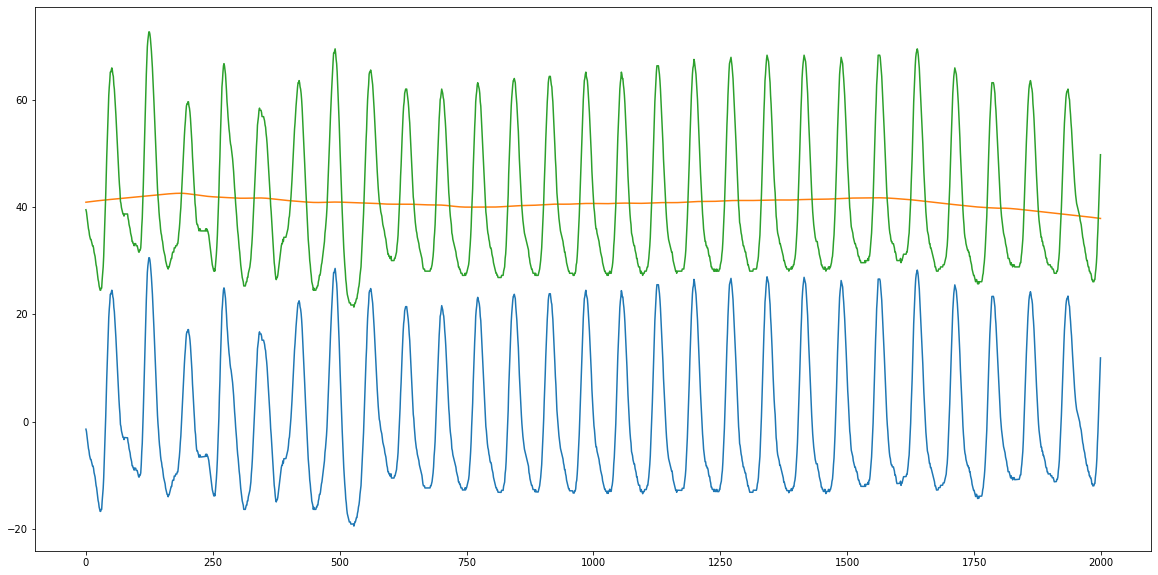

In [47]:
plt.figure(figsize=(20,10))
plt.plot(ppg_input)
plt.plot(lowess(ppg_inp))
plt.plot(ppg_inp)

## validation of dataset (before intubation)

  segment 1...loaded peak...

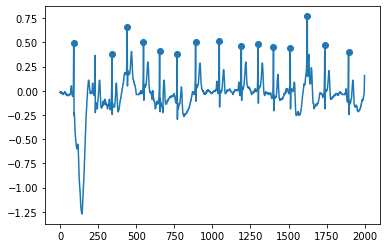

  segment 2...loaded peak...

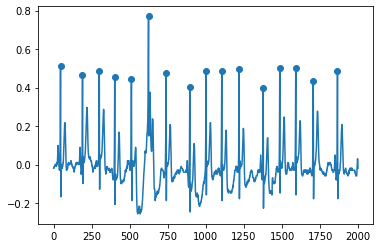

  segment 3...loaded peak...

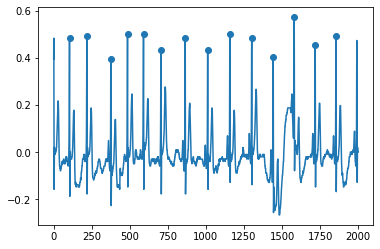

  segment 4...loaded peak...

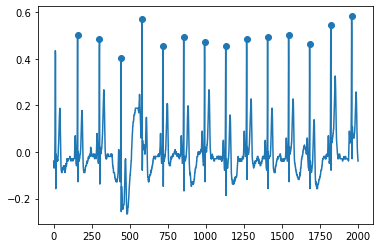

  segment 5...loaded peak...

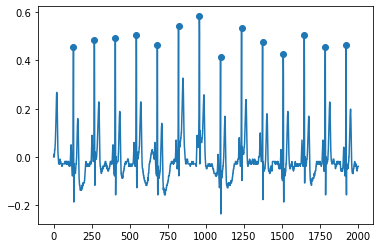

In [23]:
caseid = '5882'
file_path = 'input_60s'
filename = f'{file_path}/{caseid}.npz'
vals = np.load(f'{file_path}/{caseid}.npz')


LEN_INPUT = 20
OVERLAP = 10
SRATE = 100
    
ppg_cache = f"cache/peaks/PPG_{SRATE}Hz_1min_seg/" + caseid
ecg_cache = f"cache/peaks/ECG_{SRATE}Hz_1min_seg/" + caseid    
ecg_cache2 = f"cache/peaks/ECG_{SRATE}Hz_1min_seg/" + caseid


# 20초 단위로 끊기

for i in range(5):
    #i = 1
    print('  segment', i+1, end='')
    start_idx = i*OVERLAP*SRATE # 500i
    end_idx = (i*OVERLAP + LEN_INPUT)*SRATE # 500i + 1000


    ### non-event input ###
    seg_ppg = vals['nPPG'][start_idx:end_idx]
    seg_ecg = vals['nECG'][start_idx:end_idx]


    ## 1. 결측치 처리 ##             
    # df.isnull().sum() 하면 더 간단하게 가능하나 애초에 NRS에 해당하는 vital data가 120초 보다 짧은 경우
    nan_ppg_list = np.isnan(seg_ppg)
    nan_ecg_list = np.isnan(seg_ecg)
    nan_ppg_perc = np.sum(nan_ppg_list) / LEN_INPUT / SRATE
    nan_ecg_perc = np.sum(nan_ecg_list) / LEN_INPUT / SRATE

    # ECG, PPG 둘다 결측치인 부분
    nan_both_perc = 0
    for j in range(len(seg_ppg)):
        if nan_ppg_list[j] and  nan_ecg_list[j]:
            nan_both_perc += 1
    nan_both_perc /= (LEN_INPUT*SRATE)

    # segment의 결측치 비율 정보
    nan_info = [nan_ppg_perc, nan_ecg_perc, nan_both_perc]

    # 결측치가 많은 경우, noise 확인할 것도 없이 False -  이 경우의 noise_info는 -1로 처리
    if nan_ppg_perc > 0.05 or nan_ecg_perc > 0.05 or nan_both_perc > 0.05:
        print('too much missing data')



    ## 2. Noise 처리 ##
    # peak detection
    if os.path.exists(ppg_cache+'_n{}'.format(i+1)):
        _, ppg_peak = pickle.load(open(ppg_cache+'_n{}'.format(i+1), 'rb'))
        ecg_peak = pickle.load(open(ecg_cache+'_n{}'.format(i+1), 'rb'))
        print('...loaded peak...', end='')


    else:
        try:
            min_peak, ppg_peak = arr.detect_peaks(pd.DataFrame(seg_ppg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten(), SRATE)
            ecg_peak = arr.detect_qrs(pd.DataFrame(seg_ecg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten(), SRATE)


        except Exception as e:
            print('error of', e)
            error_list.append(caseid)


        if len(ppg_peak)==0:
            print('no peak')


    # 10초 segment 내의 ppg, ecg peak idx
    #seg_ppg_min = ppg_min[(start_idx<=np.array(ppg_min)) & (np.array(ppg_min)<end_idx)]
    idx_ppg_peak = ppg_peak
    idx_ecg_peak = ecg_peak



    # peak가 HR 30~150 -> 20s - min 10 peaks(HR30)
    # peak 개수가 기준 미달이면 noise 계산 자세히 할 필요없이 False - 이 경우의 noise_info는 -2로 처리
    if len(idx_ppg_peak)<5/10*LEN_INPUT or len(idx_ecg_peak)<5/10*LEN_INPUT:
        print('too less peaks')

        
    chan = 'ECG'
    if chan == 'PPG':
        plt.plot(seg_ppg)
        plt.scatter(idx_ppg_peak, seg_ppg[idx_ppg_peak])
        plt.show()
        
    if chan == 'ECG':
        plt.plot(seg_ecg)
        plt.scatter(idx_ecg_peak, seg_ecg[idx_ecg_peak])
        plt.show()        

## validation of dataset (after intubation)

  segment 1...loaded peak...

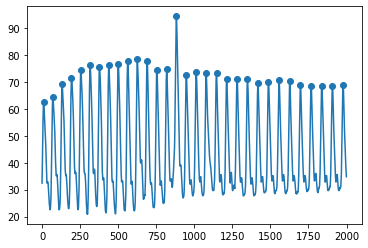

  segment 2...loaded peak...too less peaks


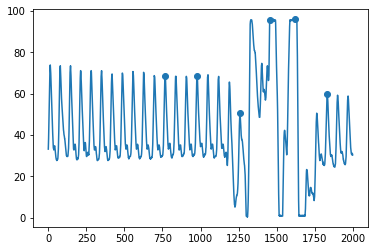

  segment 3...loaded peak...

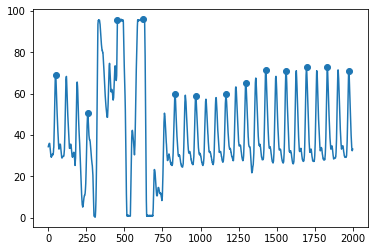

  segment 4...loaded peak...

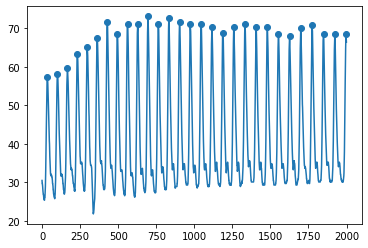

  segment 5...loaded peak...

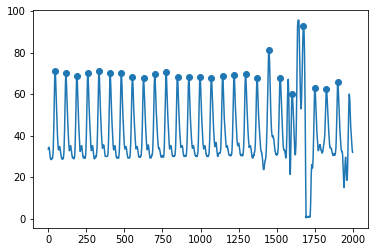

In [20]:
caseid = '373'
file_path = 'input_60s'
filename = f'{file_path}/{caseid}.npz'
vals = np.load(f'{file_path}/{caseid}.npz')


LEN_INPUT = 20
OVERLAP = 10
SRATE = 100
    
ppg_cache = f"cache/peaks/PPG_{SRATE}Hz_1min_seg/" + caseid
ecg_cache = f"cache/peaks/ECG_{SRATE}Hz_1min_seg/" + caseid    
ecg_cache2 = f"cache/peaks/ECG_{SRATE}Hz_1min_seg/" + caseid


# 20초 단위로 끊기

for i in range(5):
    #i = 1
    print('  segment', i+1, end='')
    start_idx = i*OVERLAP*SRATE # 500i
    end_idx = (i*OVERLAP + LEN_INPUT)*SRATE # 500i + 1000


    ### non-event input ###
    seg_ppg = vals['PPG'][start_idx:end_idx]
    seg_ecg = vals['ECG'][start_idx:end_idx]


    ## 1. 결측치 처리 ##             
    # df.isnull().sum() 하면 더 간단하게 가능하나 애초에 NRS에 해당하는 vital data가 120초 보다 짧은 경우
    nan_ppg_list = np.isnan(seg_ppg)
    nan_ecg_list = np.isnan(seg_ecg)
    nan_ppg_perc = np.sum(nan_ppg_list) / LEN_INPUT / SRATE
    nan_ecg_perc = np.sum(nan_ecg_list) / LEN_INPUT / SRATE

    # ECG, PPG 둘다 결측치인 부분
    nan_both_perc = 0
    for j in range(len(seg_ppg)):
        if nan_ppg_list[j] and  nan_ecg_list[j]:
            nan_both_perc += 1
    nan_both_perc /= (LEN_INPUT*SRATE)

    # segment의 결측치 비율 정보
    nan_info = [nan_ppg_perc, nan_ecg_perc, nan_both_perc]

    # 결측치가 많은 경우, noise 확인할 것도 없이 False -  이 경우의 noise_info는 -1로 처리
    if nan_ppg_perc > 0.05 or nan_ecg_perc > 0.05 or nan_both_perc > 0.05:
        print('too much missing data')



    ## 2. Noise 처리 ##
    # peak detection
    if os.path.exists(ppg_cache+'_{}'.format(i+1)):
        _, ppg_peak = pickle.load(open(ppg_cache+'_{}'.format(i+1), 'rb'))
        ecg_peak = pickle.load(open(ecg_cache+'_{}'.format(i+1), 'rb'))
        print('...loaded peak...', end='')


    else:
        try:
            min_peak, ppg_peak = arr.detect_peaks(pd.DataFrame(seg_ppg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten(), SRATE)
            ecg_peak = arr.detect_qrs(pd.DataFrame(seg_ecg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten(), SRATE)


        except Exception as e:
            print('error of', e)
            error_list.append(caseid)


        if len(ppg_peak)==0:
            print('no peak')


    # 10초 segment 내의 ppg, ecg peak idx
    #seg_ppg_min = ppg_min[(start_idx<=np.array(ppg_min)) & (np.array(ppg_min)<end_idx)]
    idx_ppg_peak = ppg_peak
    idx_ecg_peak = ecg_peak



    # peak가 HR 30~150 -> 20s - min 10 peaks(HR30)
    # peak 개수가 기준 미달이면 noise 계산 자세히 할 필요없이 False - 이 경우의 noise_info는 -2로 처리
    if len(idx_ppg_peak)<5/10*LEN_INPUT or len(idx_ecg_peak)<5/10*LEN_INPUT:
        print('too less peaks')

    plt.plot(seg_ppg)
    plt.scatter(idx_ppg_peak, seg_ppg[idx_ppg_peak])
    plt.show()

## etc

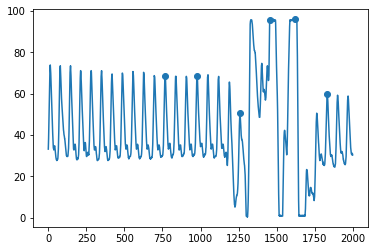

In [17]:
plt.plot(seg_ppg)
plt.scatter(idx_ppg_peak, seg_ppg[idx_ppg_peak])

In [3]:
caseid = 28
filename = f'{file_path}/{caseid}.npz'
vals = np.load(f'{file_path}/{caseid}.npz')
vals['INTU']

array([nan, nan, nan, ..., nan, nan, nan])

In [11]:
c_vent, c_ppf, c_rftn = [], [], []

for caseid in list(vitaldb.caseids_tiva)[:]:
    filename = f'{file_path}/{caseid}.npz'
    vals = np.load(f'{file_path}/{caseid}.npz')
    
    if not np.mean(~np.isnan(vals['INTU'])):
        c_vent.append(caseid)
        
    if not np.mean(~np.isnan(vals['PPF'])):
        c_ppf.append(caseid)
        
    if not np.mean(~np.isnan(vals['RFTN'])):
        c_rftn.append(caseid)
    
print(f'c_vent: {c_vent}')
print(f'c_ppf: {c_ppf}')
print(f'c_rftn: {c_rftn}')

c_vent: [17, 20, 28, 46, 67, 75, 77, 83, 103, 104, 125, 132, 136, 158, 160, 167, 177, 181, 195, 203, 215, 236, 259, 268, 293, 295, 297, 306, 318, 332, 336, 338, 353, 354, 365, 383, 397, 435, 468, 481, 495, 513, 531, 570, 574, 584, 593, 603, 623, 624, 628, 629, 631, 634, 641, 645, 654, 661, 669, 685, 706, 716, 726, 729, 756, 777, 783, 794, 812, 819, 835, 844, 860, 869, 886, 904, 917, 922, 926, 947, 959, 972, 995, 1004, 1016, 1019, 1025, 1041, 1073, 1074, 1087, 1089, 1095, 1115, 1120, 1123, 1154, 1157, 1165, 1166, 1219, 1221, 1230, 1240, 1264, 1307, 1310, 1319, 1336, 1338, 1375, 1376, 1392, 1404, 1408, 1411, 1413, 1425, 1432, 1440, 1444, 1447, 1449, 1456, 1474, 1481, 1485, 1488, 1497, 1511, 1523, 1546, 1601, 1602, 1613, 1614, 1615, 1628, 1656, 1657, 1658, 1662, 1665, 1672, 1676, 1681, 1687, 1690, 1710, 1718, 1726, 1728, 1730, 1735, 1747, 1749, 1757, 1765, 1768, 1784, 1802, 1844, 1866, 1875, 1882, 1890, 1896, 1912, 1918, 1922, 1925, 1944, 1945, 1971, 1995, 1999, 2015, 2016, 2023, 2029, 20

In [13]:
print(len(list((vitaldb.caseids_tiva))))
print(len(c_vent))

2765
604


28
[       nan        nan        nan ... 1.21591997 1.61090004 1.21591997]
0.9987993457735485


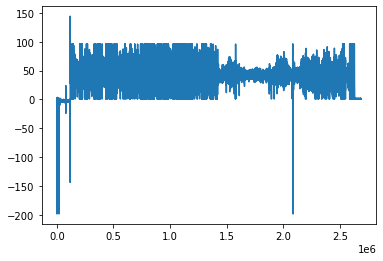

In [16]:
for caseid in list(vitaldb.caseids_tiva)[10:11]:
    filename = f'{file_path}/{caseid}.npz'
    vals = np.load(f'{file_path}/{caseid}.npz')
    
    print(caseid)
    y = vals['PPG']
    print(y)
    print(np.mean(~np.isnan(y)))
    
    plt.plot(y[~np.isnan(y)])

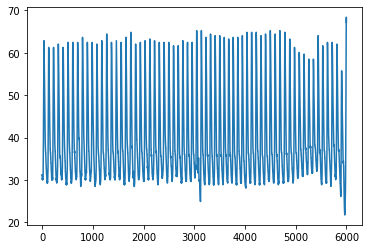

In [25]:
caseid = 3
filename = f'{file_path}/{caseid}.npz'
vals = np.load(f'{file_path}/{caseid}.npz')

intu = vals['INTU']

t_intu = np.where(~np.isnan(intu))[0][0]


# non-event data : extract vital from previous 120s-60s from intubation
ppg = vals['PPG']
prev_ppg = ppg[t_intu-SRATE*120:t_intu-SRATE*60]

ecg = vals['ECG']
prev_ecg = ecg[t_intu-SRATE*120:t_intu-SRATE*60]

plt.plot(prev_ppg)

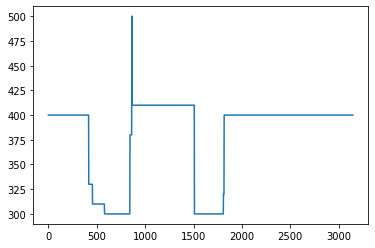

In [9]:
### FOR TESTING ###

load_val = np.load(f'{file_path}/13.npz')

#print(load_val['ECG'])
# df = pd.read_csv("https://api.vitaldb.net/cases")
# print(df)

y = load_val['INTU']

plt.plot(y[~np.isnan(y)])

In [4]:
# tracks to extract / VENT_SET_TV -> VENT_INSP_TM, SET_INSP_TM
track_names = ["SNUADC/ECG_II", "SNUADC/PLETH", "Solar8000/VENT_INSP_TM", "Primus/SET_INSP_TM", "Orchestra/PPF20_CE", "Orchestra/RFTN20_CE"]
caseid = 373

vf = vitaldb.VitalFile(caseid, track_names)
vf.to_vital('373.vital')

AttributeError: module 'vitaldb' has no attribute 'to_vital'

## preprocessing validation

In [12]:
import vitaldb

# create saving folder
file_path = "input_60s"
SRATE = 100
OVERLAP = 10
LEN_INPUT = 20
n_aug = 5
    
# target patients' caseids; discarded 15 cases which don't have the index to guess intubation time 
df = pd.read_csv("https://api.vitaldb.net/cases")
caseids = (vitaldb.caseids_tiva & set(df.loc[df['ane_type'] == 'General', 'caseid']))
caseids = list(caseids - {1095, 1728, 2411, 2464, 2733, 3569, 3759, 4200, 4261, 4623, 4886, 5289, 5329, 5696, 6285})
    

cnt = 0
for caseid in caseids[:]:
    cnt = cnt + 1
    print(f'{cnt}/{len(caseids)}')
    vals = np.load(f'{file_path}/{caseid}.npz')
       
    # 20초 단위로 끊기
    for i in range(n_aug):
        print('  segment', i+1, end='')
        start_idx = i*OVERLAP*SRATE # 500i
        end_idx = (i*OVERLAP + LEN_INPUT)*SRATE # 500i + 1000

        # 통증 점수 계산
        ### TSS(total surgical stimulation) = 1.57 - rftn20_ce / 3
        ### CISA(combined index of stimulus and analgesia) = stim_intensity - beta * ce + gamma, beta = 1/8, gamma = 1.5, stim_intensity = 5.5 
        rftn = vals['RFTN'][start_idx:end_idx]
        rftn = np.mean(rftn[~np.isnan(rftn)])
        if rftn <= 0:
            print(caseid)
            print(Abc)

        tss = 1.57 - rftn / 3
        if tss < 0:
            tss = 0
        cisa = 7 - rftn / 8

            

1/2684
  segment 1  segment 2  segment 3  segment 4  segment 52/2684
  segment 1  segment 2  segment 3  segment 4  segment 53/2684
  segment 1  segment 2  segment 3  segment 4  segment 54/2684
  segment 1  segment 2  segment 3  segment 4  segment 55/2684
  segment 1  segment 2  segment 3  segment 4  segment 56/2684
  segment 1  segment 2  segment 3  segment 4  segment 57/2684
  segment 1  segment 2  segment 3  segment 4  segment 58/2684
  segment 1  segment 2  segment 3  segment 4  segment 59/2684
  segment 1  segment 2  segment 3  segment 4  segment 510/2684
  segment 1  segment 2  segment 3  segment 4  segment 511/2684
  segment 1  segment 2  segment 3  segment 4  segment 512/2684
  segment 1  segment 2  segment 3  segment 4  segment 513/2684
  segment 1  segment 2  segment 3  segment 4  segment 514/2684
  segment 1  segment 2  segment 3  segment 4  segment 515/2684
  segment 1  segment 2  segment 3  segment 4  segment 516/2684
  segment 1  segment 2  segment 3  segment 4  segment 51

/home/painstudy/anaconda3/envs/keras/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/painstudy/anaconda3/envs/keras/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


NameError: name 'Abc' is not defined

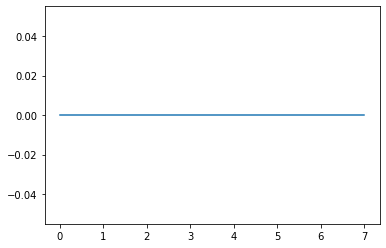

In [17]:
import matplotlib.pyplot as plt

rft = vals['RFTN']
plt.plot(rft[~np.isnan(rft)])


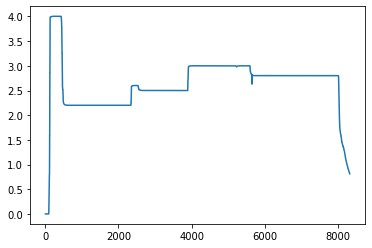

In [18]:
# dataframe of patient information    
df = pd.read_csv("https://api.vitaldb.net/cases")
track_names = ["SNUADC/ECG_II", "SNUADC/PLETH", "Solar8000/VENT_INSP_TM", "Primus/SET_INSP_TM", "Orchestra/PPF20_CE", "Orchestra/RFTN20_CE"]

caseid = 166
vf = vitaldb.VitalFile(caseid, track_names)
vals = vf.to_numpy(track_names, interval=1/SRATE)


rft = vals[:,4]
plt.plot(rft[~np.isnan(rft)])

In [54]:
idc_intu

array([  87677,   87879,   88079, ..., 1837120, 1837320, 1837520])

In [57]:
#t_intu = np.where(~np.isnan(vals['RFTN']))[0][0]
t_intu = 87677
idc_intu = np.where(~np.isnan(intu))[0]
idx = np.where(idc_intu==t_intu)[0][0]


prev = t_intu
switch = True
for i in range(1,16):
    if idc_intu[idx+i] - prev > 210:
        print('too far ', i)
        switch = False  
    prev = idc_intu[idx+i]

if switch:
    print('yes')

too far  4


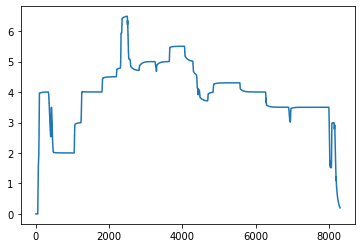

87677
87879
88079
88279
131484


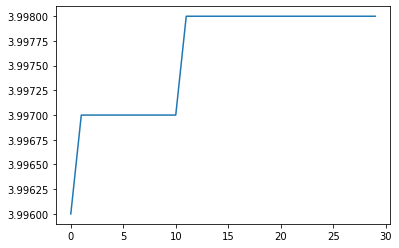

In [60]:
# create saving folder
file_path = "vital_np"
save_path = "input_60s"
if not os.path.exists(save_path):
    os.mkdir(save_path)
    
    
caseid = 166
vals = np.load(f'{file_path}/{caseid}.npz')
    
rft = vals['RFTN']   
plt.plot(rft[~np.isnan(rft)])
plt.show()
    
# intubation time - find the first t which satisfies vent_set_tm != nan & ppf_ce != nan
t_intu = np.where(~np.isnan(vals['RFTN']))[0][0]

intu = vals['INTU']
idc_intu = np.where(~np.isnan(intu))[0]
while True:
    # vent_insp_tm이 nan이 아닌 경우
    if not np.isnan(intu[t_intu]):
        print(t_intu)
        idx = np.where(idc_intu==t_intu)[0][0]
        prev = t_intu
        
        switch = True
        for i in range(1,16):
            if idc_intu[idx+i] - prev > 210:
                switch = False
                t_intu = t_intu + 1
            prev = idc_intu[idx+i]
        
        if switch:
            break
            
    else:
        t_intu = t_intu + 1

        
        
        
        
ppf = vals['PPF']
ppf = ppf[t_intu:t_intu + SRATE*60]

rftn = vals['RFTN']
rftn = rftn[t_intu:t_intu + SRATE*60]

plt.plot(rftn[~np.isnan(rftn)])
plt.show()


In [66]:
t_intu

131484

In [39]:
t_intu = np.where(~np.isnan(vals['RFTN']))[0][0]

intu = vals['INTU']
while True:
    if not np.isnan(intu[t_intu]):
        break
    else:
        t_intu = t_intu + 1
t_intu

87677

In [41]:
np.where(~np.isnan(vals['RFTN']))[0][:100]

array([ 49835,  49862,  49878,  49894,  49910,  49925,  49969,  50033,
        50747,  51156,  51748,  52750,  53749,  54751,  55752,  56754,
        57753,  58755,  59756,  60756,  61757,  62759,  63760,  64760,
        65764,  66766,  67764,  68765,  69767,  70768,  71768,  72769,
        73771,  74771,  75772,  76773,  77773,  78775,  79774,  80776,
        81777,  82778,  83778,  84780,  85783,  86784,  87782,  88784,
        89785,  90786,  91690,  91729,  91786,  92789,  93768,  93788,
        93816,  93944,  93983,  93997,  94034,  94342,  94357,  94434,
        94789,  94970,  95259,  95285,  95310,  95450,  95466,  95498,
        95512,  95657,  95790,  95851,  95939,  95969,  96016,  96048,
        96062,  96102,  96792,  97011,  97038,  97054,  97080,  97793,
        98031,  98062,  98794,  99030,  99065,  99794, 100796, 101797,
       102797, 103798, 104800, 104979])

In [37]:
np.where(~np.isnan(vals['INTU']))[0][:100]

array([ 87677,  87879,  88079,  88279, 131484, 131684, 131884, 132084,
       132284, 132484, 132684, 132884, 133084, 133283, 133483, 133683,
       133883, 134083, 134283, 134483, 134683, 134883, 135083, 135283,
       135483, 135685, 135885, 136085, 136285, 136485, 136685, 136885,
       137085, 137285, 137485, 137685, 137884, 138085, 138284, 138484,
       138684, 138884, 139084, 139284, 139484, 139684, 139884, 140084,
       140284, 140486, 140686, 140886, 141086, 141286, 141486, 141686,
       141886, 142086, 142286, 142486, 142686, 142886, 143086, 143285,
       143485, 143685, 143885, 144085, 144285, 144485, 144685, 144885,
       145085, 145285, 145485, 145685, 145885, 146085, 146285, 146485,
       146685, 146885, 147085, 147285, 147485, 147685, 147885, 148085,
       148285, 148485, 148685, 148886, 149086, 149285, 149486, 149686,
       149886, 150086, 150286, 150486])

In [34]:
rft = vals['RFTN'][87677:936770]
 rft[~np.isnan(rft)][:100]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.15899999, 0.588     ,
       0.588     , 0.63200003, 0.70499998, 0.713     , 0.713     ,
       0.76099998, 0.93199998, 0.93199998, 1.00699997, 1.23800004,
       1.36300004, 1.52699995, 1.52699995, 1.55900002, 1.63999999,
       1.63999999, 1.66499996, 1.66499996, 1.70700002, 1.81200004,
       1.81200004, 1.89600003, 1.89600003, 1.93400002, 1.93400002,
       1.93400002, 1.93400002, 2.25699997, 2.35800004, 2.35800004,
       2.35800004, 2.37899995, 2.6329999 , 2.7190001 , 2.73399997,
       3.01099992, 3.08800006, 3.10599995, 3.32800007, 3.57200003,
       3.74699998, 3.86500001, 3.93400002, 3.96499991, 3.96700001,
       3.96700001, 3.96700001, 3.96700001, 3.9690001 , 3.9690001 ,
       3.9690001 , 3.9690001 , 3.9690001 , 3.9690001 , 3.9690001 ,
       3.9690001 , 3.9690001 , 3.9690001 , 3.97000003, 3.97099996,
       3.97099996, 3.97099996, 3.97099996, 3.97199988, 3.97300

In [25]:
vals[

(1959950, 87677)